### Steps to download kaagle dataset
1. Accept competion
2. download api token
3. Copy dataset code
4. Unzip and use

In [0]:
%sh pip install kaggle
%sh
export KAGGLE_USERNAME=keerthivasan7572m
export KAGGLE_KEY=20dd0bc6704e2bd9a5d1b86659e320d2
kaggle competitions download -c dogs-vs-cats
%sh unzip dogs-vs-cats.zip

  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-5f54060d-3379-4a12-8672-8ba1492f7bed/bin/python -m pip install --upgrade pip' command.
/bin/bash: line 1: fg: no job control
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/bash: line 5: fg: no job control


In [0]:
ls /databricks/driver

azure/            ganglia/                     preload_class.lst*    train.zip
conf/             hadoop_accessed_config.lst*  sampleSubmission.csv
dogs-vs-cats.zip  logs/                        test1.zip
eventlogs/        metastore_db/                train/


In [0]:
%sh unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip


In [0]:
ls /databricks/driver

azure/            ganglia/                     preload_class.lst*    train.zip
conf/             hadoop_accessed_config.lst*  sampleSubmission.csv
dogs-vs-cats.zip  logs/                        test1.zip
eventlogs/        metastore_db/                train/


In [0]:
%sh
unzip /databricks/driver/train.zip

In [0]:
# %sh unzip -q train.zip
# %sh unzip /dbfs/FileStore/tables/rfc_model.zip -d /dbfs/FileStore/tables/rfc_model
#%sh unzip train.zip

In [0]:
pip install opencv-python

Python interpreter will be restarted.
  Using cached opencv_python-4.7.0.68-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (61.8 MB)
Python interpreter will be restarted.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import zipfile
from zipfile import ZipFile
import os
import cv2
import shutil
from tensorflow import keras
from tensorflow.keras import layers

In [0]:
data=[]
size=150
images=os.listdir("/databricks/driver/train")
train_pth="/databricks/driver/train"
labels = []
for img in images:
    img_path=os.path.join(train_pth,img)
    if img.split(".")[0]=="cat":
        img_arr=cv2.imread(img_path)
        #imr_arr=cv2.cvtColor(cv2.COLOR_BGR2RGB)
        img_arr=cv2.resize(img_arr,(size,size))
        data.append(img_arr)
        labels.append("cat")
    else:
        img_arr=cv2.imread(img_path)
        img_arr=cv2.resize(img_arr,(size,size))
        data.append(img_arr)
        labels.append("dog")

In [0]:
#plt.imshow(data[155][0])

In [0]:
# df = spark.read.csv("file:/databricks/driver/sampleSubmission.csv")
# df = df.toPandas()

# another way to read
# dbutils.fs.cp("file:/databricks/driver/sampleSubmission.csv","/FileStore/sampleSubmission.csv")
# df = spark.read.csv("/FileStore/sampleSubmission.csv")
# df = df.toPandas()

In [0]:
imageArr = np.array(data)

In [0]:
imageArr.shape

Out[4]: (25000, 150, 150, 3)

In [0]:
labelArr = np.array(labels)

In [0]:
labelArr.shape

Out[6]: (25000,)

In [0]:
#imageArr = imageArr / 255.0
# this code will crach because due to huge size so need to use keras buid in function to resize pixel

In [0]:
#?idg.flow_from_directory

In [0]:
#folder structer for kera
#mainFolder
# |-cat
# |-dog

In [0]:
os.mkdir("/databricks/driver/trainimages")
os.mkdir("/databricks/driver/trainimages/cat")
os.mkdir("/databricks/driver/trainimages/dog")

In [0]:
ls /databricks/driver/trainimages/

cat/  dog/


In [0]:
import shutil
from shutil import copy

In [0]:
source = 'train/'
destCat = '/databricks/driver/trainimages/cat/'
destDog = '/databricks/driver/trainimages/dog/'

for image in os.listdir("train"):
    if 'dog' in image:
        copy(source+image, destDog+image)
    else:
        copy(source+image, destCat+image)

In [0]:
ls /databricks/driver/trainimages/cat/

cat.0.jpg      cat.12247.jpg  cat.3248.jpg  cat.5499.jpg  cat.7749.jpg
cat.1.jpg      cat.12248.jpg  cat.3249.jpg  cat.55.jpg    cat.775.jpg
cat.10.jpg     cat.12249.jpg  cat.325.jpg   cat.550.jpg   cat.7750.jpg
cat.100.jpg    cat.1225.jpg   cat.3250.jpg  cat.5500.jpg  cat.7751.jpg
cat.1000.jpg   cat.12250.jpg  cat.3251.jpg  cat.5501.jpg  cat.7752.jpg
cat.10000.jpg  cat.12251.jpg  cat.3252.jpg  cat.5502.jpg  cat.7753.jpg
cat.10001.jpg  cat.12252.jpg  cat.3253.jpg  cat.5503.jpg  cat.7754.jpg
cat.10002.jpg  cat.12253.jpg  cat.3254.jpg  cat.5504.jpg  cat.7755.jpg
cat.10003.jpg  cat.12254.jpg  cat.3255.jpg  cat.5505.jpg  cat.7756.jpg
cat.10004.jpg  cat.12255.jpg  cat.3256.jpg  cat.5506.jpg  cat.7757.jpg
cat.10005.jpg  cat.12256.jpg  cat.3257.jpg  cat.5507.jpg  cat.7758.jpg
cat.10006.jpg  cat.12257.jpg  cat.3258.jpg  cat.5508.jpg  cat.7759.jpg
cat.10007.jpg  cat.12258.jpg  cat.3259.jpg  cat.5509.jpg  cat.776.jpg
cat.10008.jpg  cat.12259.jpg  cat.326.jpg   cat.551.jpg   cat.7760.jpg
cat.1000

In [0]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
trainGen = idg.flow_from_directory("/databricks/driver/trainimages/",target_size=(120,120), batch_size=32)
#using this image pixel pixel has been resized with minimal RAM

Found 25000 images belonging to 2 classes.


In [0]:
del model

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((120,120,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(2,activation=tf.keras.activations.softmax))

In [0]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 43200)             0         
                                                                 
 dense_25 (Dense)            (None, 256)               11059456  
                                                                 
 dense_26 (Dense)            (None, 2)                 514       
                                                                 
Total params: 11,059,970
Trainable params: 11,059,970
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss = tf.keras.losses.categorical_crossentropy, metrics = ['acc'])

In [0]:
model.fit(trainGen, batch_size=32, epochs=5)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-1878829059176656>:1
----> 1 model.fit(trainGen, batch_size=32, epochs=5, validation_split=0.2)

File /databricks/python/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py:553, in safe_patch.<locals>.safe_patch_function(*args, **kwargs)
    543 try_log_autologging_event(
    544     AutologgingEventLogger.get_logger().log_patch_function_start,
    545     session,
   (...)
    549     kwargs,
    550 )
    552 if patch_is_class:
--> 553     patch_function.call(call_original, *args, **kwargs)
    554 else:
    555     patch_function(call_original, *args, **kwargs)

File /databricks/python/lib/python3.9/site-packages/mlflow/utils/autologging_utils/safety.py:170, in PatchFunction.call(cls, original, *args, **kwargs)
    168 @classmethod
    169 def call(cls, original, *args, **kwargs):
--> 170     return cls(

In [0]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)
testGen = idg.flow_from_dataframe(df_test,'/databricks/driver/test1/',x_col='image',y_col=None,target_size=(150,150),class_mode=None,batch_size=32)

Found 12500 validated image filenames.


In [0]:
test_images = os.listdir('/databricks/driver/test1/')
df_test = pd.DataFrame({
    'image':test_images,
})
df_test.head()

,image
0,6431.jpg
1,6023.jpg
2,995.jpg
3,10001.jpg
4,1928.jpg


In [0]:
predict = model.predict(testGen)

391/391 [==============================] - 27s 69ms/step


In [0]:
# get label Name   
def get_Label(number):
    labels = {0:'Cat', 1:'Dog'}
    return labels[number]


#plot predction function
def plot_predection(model_name):
    plt.figure(figsize=(20,15))
    plt.suptitle("Predection  Images", fontsize=20)
    images = [] 
    path ='/databricks/driver/test1/'
    count = 0  #val_images,val_labels
    for i,files in enumerate(os.listdir(path)) :
        img = plt.imread(path+files)
        img = cv2.resize(img,(120,120))
        plt.imshow(img,cmap=plt.cm.binary)
        img = np.expand_dims(img, axis=0)
        feature = model_name.predict(img)
        predection  = np.argmax(feature, axis=1)
        plt.subplot(5,7,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel("Predicted"+get_Label(int(predection)))
        count += 1
        if count == 34 :
            break 

1/1 [==============================] - 0s 25ms/step


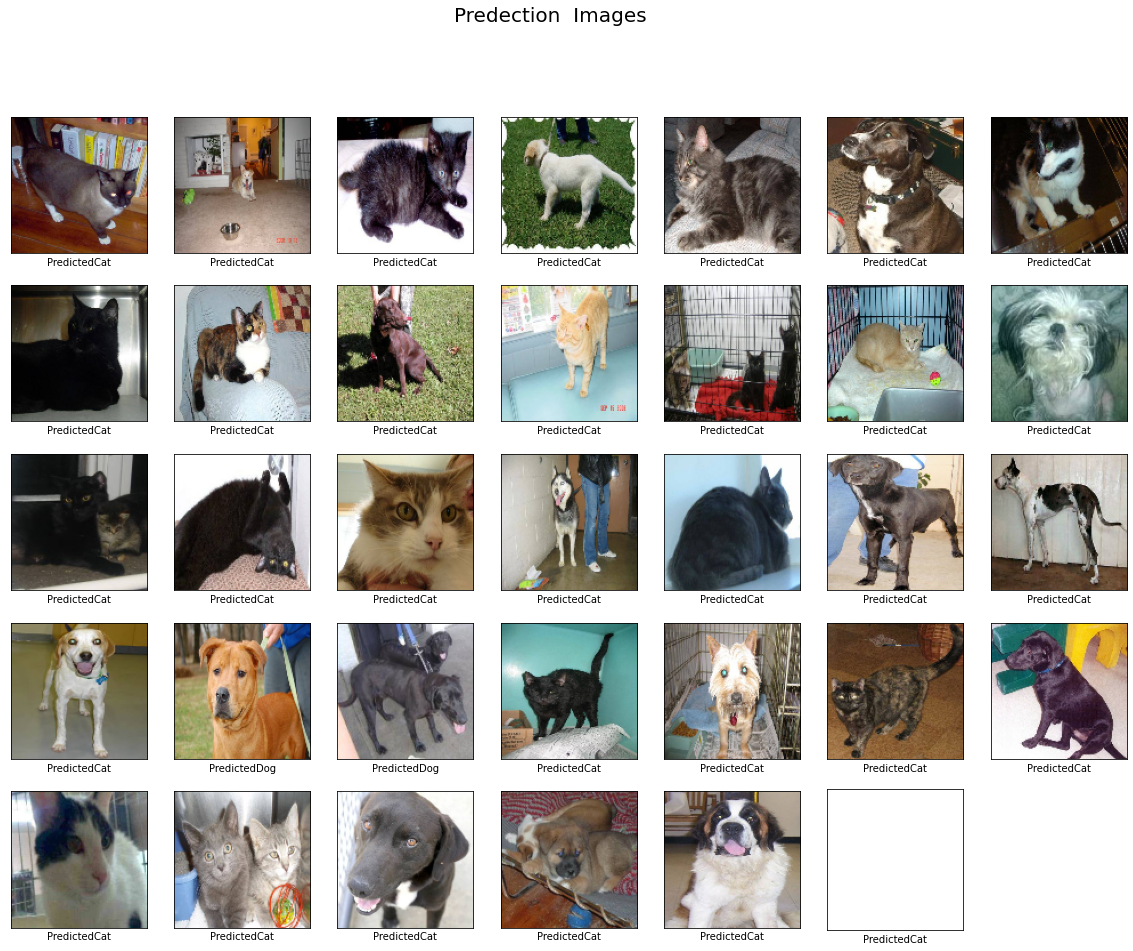

In [0]:
plot_predection(model)